# **FAKE NEWS DETECTION**

## Đọc và EDA dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
fake = pd.read_csv("Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print("Tổng các bài báo: "+ str(fake.shape[0]))
print("Số lượng bài báo theo subject:")
for key,count in fake.subject.value_counts().iteritems():
  print("\t"+str(key)+" : "+ str(count))

Tổng các bài báo: 23481
Số lượng bài báo theo subject:
	News : 9050
	politics : 6841
	left-news : 4459
	Government News : 1570
	US_News : 783
	Middle-east : 778


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


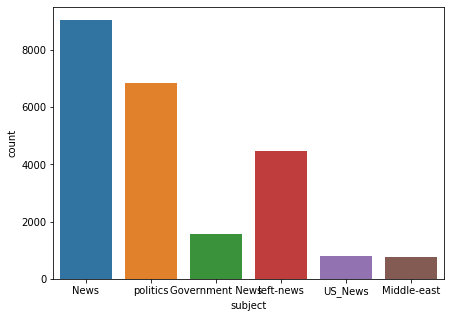

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot("subject", data=fake)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


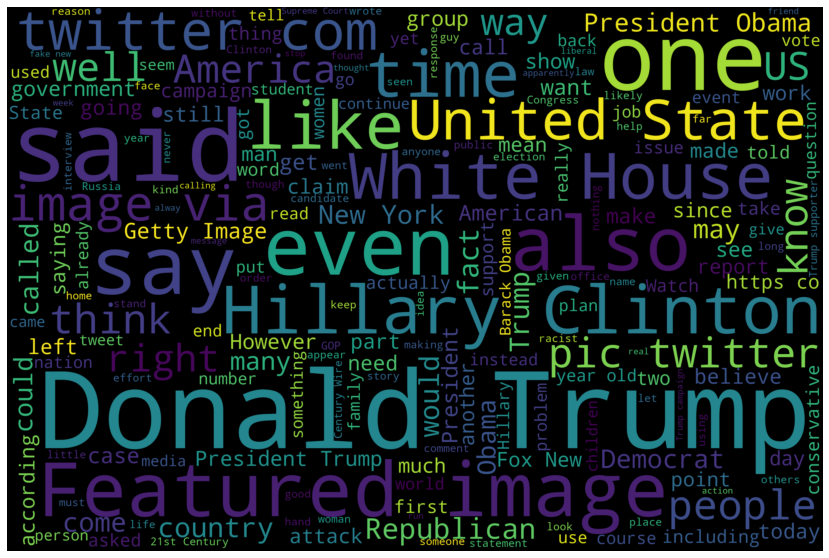

In [ ]:
#WordCloud for fakenews
#https://www.datacamp.com/community/tutorials/wordcloud-python 
#input của WordCloud là một chuỗi, ta tạo biến lưu input là text của tệp fake

#chưa tải thì tải, tải 1 lần thôi!!!
nltk.download('stopwords')

text = ''
for news in fake.text.values:
    text += f" {news}"

#tạo 1 wordcloud và cấu hình các tham số, loại bỏ stopwords
fake_wc = WordCloud(background_color = 'black', width = 3000, height = 2000, stopwords = set(nltk.corpus.stopwords.words("english")))
#generate_from_text chuyển text thành wordcloud
fake_wc.generate_from_text(text)

#show ra ngoài qua 
#interpolation = 'bilinear' làm cho hình ảnh hiển thị hiển thị mượt mà hơn
plt.figure(figsize=[20,10])
plt.imshow(fake_wc, interpolation = 'bilinear')
#tắt chú thích 2 trục
plt.axis("off")
plt.show()

#dùng xong thì xóa text, lát còn vẽ cho real
del text

In [ ]:
true = pd.read_csv("True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
print("Tổng các bài báo thật: "+ str(true.shape[0]))
print("Số lượng bài báo theo subject:")
for key,count in true.subject.value_counts().iteritems():
  print("\t"+str(key)+" : "+ str(count))

Tổng các bài báo thật: 21417
Số lượng bài báo theo subject:
	politicsNews : 11272
	worldnews : 10145


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


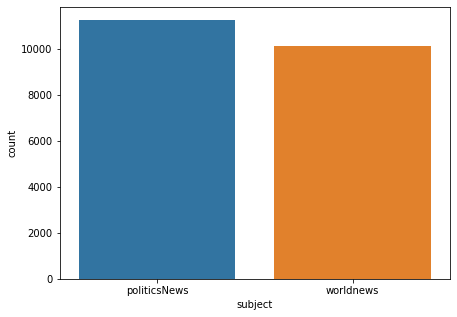

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot("subject", data=true)
plt.show()

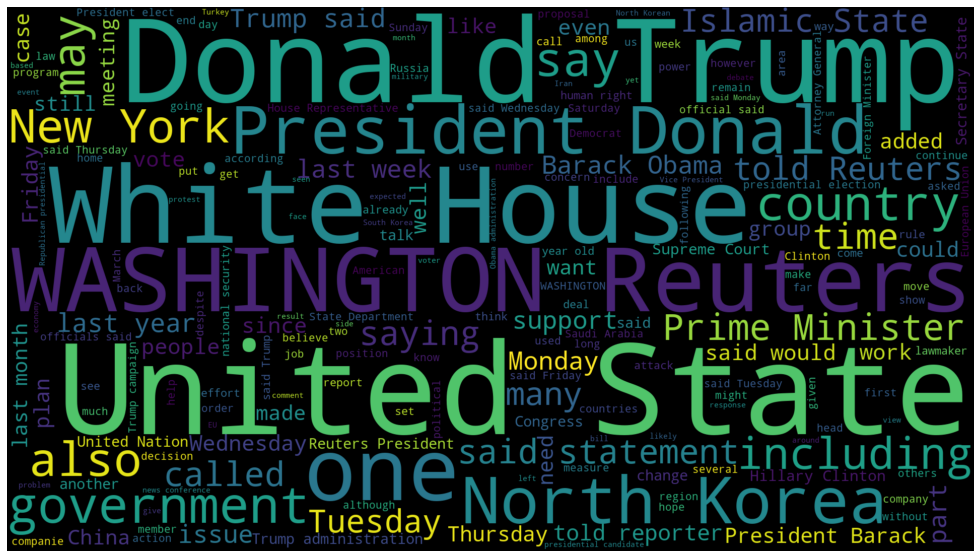

In [ ]:
#WordCloud for realnews

text = ''
for news in true.text.values:
    text += f" {news}"

true_wc = WordCloud(background_color = 'black', width = 1920, height = 1080, stopwords = set(nltk.corpus.stopwords.words("english")))
true_wc.generate_from_text(text)

plt.figure(figsize=[20,10])
plt.axis("off")
plt.imshow(true_wc, interpolation = 'bilinear')
plt.show()
del text

## Tiền xử lí



*  Loại bỏ bài báo có nội dung rỗng
*  Thêm thuộc tính "Reuter"- nhà phát hành cho tệp tin thật








### Loại bỏ tin có nội dung rỗng

In [ ]:
#Loại bỏ tin có nội dung rỗng ở fakenews
empty_fake_index = [index for index,text in enumerate(fake.text.values) if str(text).strip() == '']

#tổng hàng có nội dung rỗng
print("Tổng bài báo giả mạo có nội dung rỗng: "+str(len(empty_fake_index)))

#xem chi tiết các hàng có nội dung rỗng
fake.iloc[empty_fake_index].tail()

Tổng bài báo giả mạo có nội dung rỗng: 630


,title,text,subject,date
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015"


In [ ]:
empty_true_index = [index for index,text in enumerate(true.text.values) if str(text).strip() == '']

#tổng hàng có nội dung rỗng
print("Tổng bài báo thật có nội dung rỗng: "+str(len(empty_true_index)))

#xem chi tiết các hàng có nội dung rỗng
true.iloc[empty_true_index].tail()

Tổng bài báo thật có nội dung rỗng: 1


,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


In [ ]:
#loại bỏ
true = true.drop(empty_true_index)
fake = fake.drop(empty_fake_index)
#kiểm tra lại số row mỗi tệp
print("Tổng các bài báo thật: "+ str(true.shape[0]))
print("Tổng các bài báo giả: "+ str(fake.shape[0]))

Tổng các bài báo thật: 21416
Tổng các bài báo giả: 22851


### Tách thuộc tính "Reuter"

In [ ]:
#Thêm thuộc tính "Reuter"- nhà phát hành cho tệp tin thật
#tin ko có "Reuter"(kể cả tin trên twitter) sẽ được gán "unknown"
#tin trên twitter có độ dài giới hạn < 260 kí tự

#unknown_publishers lưu index những tin ko có "Reuter"
unknown_reuters = []
for index,row in enumerate(true.text.values):
    #kiểm tra đk trong try, nếu lỗi thì thực hiện lệnh trong except
    try:
        #split tách chuỗi theo "-"(mặc định tách theo dấu space)
        #record tạm có 2 phần tử: trước dấu "-"(nếu có) và sau dấu "-"
        record = row.split(" -", maxsplit=1)
        
        #tin sau khi split nếu có n phần thì sẽ gồm record[0] -> record[n]
        #nếu tin chỉ có 1 record, record[1] sẽ có thông báo lỗi vì không tồn tại
        record[1]

        #lúc này là chắc kèo record có nhiều hơn 2 phần tử
        #assert là phương thức check chuỗi theo điều kiện trong "()", giá trị trả về của nó dạng logic, nếu điều kiện sai sẽ có thông báo lỗi
        #
        #assert(len(record[0]) < 260)
        
    except:
        unknown_reuters.append(index)

In [ ]:
#check thử "text" cái bài báo ko có "Reuter"
print("Tổng bài báo không có thông tin nhà phát hành: " + str(len(unknown_reuters)) + "\n")
true.iloc[unknown_reuters].text

Tổng bài báo không có thông tin nhà phát hành: 20



3488    The White House on Wednesday disclosed a group...
4358    Neil Gorsuch, President Donald Trump’s appoint...
4465    WASHINGTON The clock began running out this we...
5784    Federal appeals court judge Neil Gorsuch, the ...
6660    Republican members of Congress are complaining...
6823    Over the course of the U.S. presidential campa...
7922    After going through a week reminiscent of Napo...
8194    The following timeline charts the origin and s...
8195    Global health officials are racing to better u...
8247    U.S. President Barack Obama visited a street m...
8465    ALGONAC, MICH.—Parker Fox drifted out of the D...
8481    Global health officials are racing to better u...
8482    The following timeline charts the origin and s...
8505    Global health officials are racing to better u...
8506    The following timeline charts the origin and s...
8771    In a speech weighted with America’s complicate...
9008    The following timeline charts the origin and s...
9009    Global

In [ ]:
#tạo column mới "Reuter"
#reuters chứa nội dung cột reuters
reuters = []

#tmp_reuters chứa nội dung cột text
tmp_reuters = []

for index,row in enumerate(true.text.values):
    #nếu tin xuất hiện trong unknown_publishers thì thêm gắn "Unknown" vào reuters
    if index in unknown_reuters:
        tmp_reuters.append(row)        
        reuters.append("Unknown")
        continue
    #ngược lại(tin có reuters), split tin ra: record[0] chứa reuters -> reuters; record[1] chứa text -> text
    record = row.split(" -", maxsplit=1)
    reuters.append(record[0])
    tmp_reuters.append(record[1])

true["reuters"] = reuters
true["text"] = tmp_reuters

del reuters, tmp_reuters, record, unknown_reuters

In [ ]:
true.head(10)

,title,text,subject,date,reuters
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to ...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla./WASHINGTON (Reuters)"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he be...,politicsNews,"December 29, 2017","WEST PALM BEACH, Fla (Reuters)"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so...,politicsNews,"December 29, 2017",The following statements were posted to the ve...
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! ...",politicsNews,"December 29, 2017",The following statements were posted to the ve...
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said ...,politicsNews,"December 28, 2017",WASHINGTON (Reuters)


### Gộp dữ liệu


*   Tạo column "label": 1 cho tin thật, 0 cho tin giả
*   Giữ lại "text", xóa các thuộc tính khác



In [ ]:
#tạo label
true["label"] = 1
fake["label"] = 0

In [ ]:
#tiêu đề có thể phụ trợ nội dung bài báo nên gộp "text" và "title" = "content"
true["content"] = true["title"] + " " + true["text"]
fake["content"] = fake["title"] + " " + fake["text"]

#xóa các thuộc tính ngoại trừ "content"
true = true.drop(["subject", "date", "title", "text", "reuters"], axis=1)
fake = fake.drop(["subject", "date", "title", "text"], axis=1)

#ghép 2 tệp lại
#ignore_index=True ko tìm thấy
data = true.append(fake, ignore_index=True)

## Tokenize
Tuy đã qua bước tiền xử lí nhưng dữ liệu ta đang có là dữ liệu thô. Trước khi nhúng từ, ta phải đi qua 1 bước xử lí dữ liệu nữa gồm:


*   Loại bỏ "stop words"
*   Phân rã văn bản bằng "tokenize" thàng các phần nhỏ hơn gọi là "token": phân rã theo từ, câu,...

(tokenize của nltk)



In [ ]:
#các "label" chính là đáp án(Y) bài toán nên ta cần tách đáp án này ra khỏi dữ liệu(X)
Y = data["label"].values


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
#ví dụ "stop words"
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

#RegexpTokenizer phân rã văn bản theo Regexp(https://viblo.asia/p/regular-expressions-regex-khong-he-kho-nhu-nhung-gi-ban-thay-ii-L4x5xg3YlBM , https://topdev.vn/blog/regex-la-gi/#regex-la-gi)
#các "token" được tạo theo đk "r'\w+'" sẽ chỉ gồm các từ được tạo từ các kí tự bình thường, không gồm khoảng trắng, kí tự đặc biệt(kể cả dấu câu) và được phép xuất hiện nhiều hơn 1 lần
#trình kiểm tra Regexp https://pythex.org/?regex=%5B%5Cw%27%5D%2B&test_string=How%27s%20it%20going%20%24%23%24%23&ignorecase=0&multiline=0&dotall=0&verbose=0
#https://www.kite.com/python/docs/nltk.tokenize.regexp 

#ví dụ quan tokenizer này: "It's you" -> ["it's", "you"]


tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
#tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

X = []
for x in data["content"].values:
    tmp = []
    #nltk.sent_tokenize: mã hóa văn bản thành các câu
    sentences = nltk.sent_tokenize(x)
    for sent in sentences:
        #tắt trạng thái viết hoa về thường, vì Word2vec sử dụng dạng từ thường
        sent = sent.lower()
        #tách sent thành các phần token nhỏ hơn và lưu vào tokens
        tokens = tokenizer.tokenize(sent)
        #trip xóa phần thừa ở đầu và cuối chuỗi, thường là khoảng trắng
        #filtered_words chứa các token hợp lệ: ko phải stop_words và ko là khoảng trắng
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'und

## Nhúng từ: Word2vec (CBOW)

*   Ta sẽ nhúng từ nhờ GenSim.




*   Các ma trận nhúng từ đều có chiều được đặt là 100.
*   Mô hình CBOW được sử dụng.



In [ ]:
#CBOW
import gensim

#sentences: input của mô hình này tập X đã được làm sạch
#size: kích thước ma trận nhúng từ
#window: windowsize
#min_count: Bỏ qua tất cả các từ có tổng tần suất thấp hơn tần suất này
#sg: Thuật toán huấn luyện: skip-gram(1) và CBOW(0, mặc định)
#ngoài ra còn có các thông số khác https://radimrehurek.com/gensim/models/word2vec.html 
cbow = gensim.models.Word2Vec(sentences=X, size=100, window=5, min_count=1)

#đối tượng "wv" là sự ánh xạ của input và ma trận nhúng, thông qua đối tượng này ta gọi các module xử lí
len(cbow.wv.vocab)

122237

In [ ]:
len(cbow.wv.vocab)

122237

In [ ]:
cbow.corpus_total_words

10987173

In [ ]:
#trực quan vector nhúng từ theo cbow
cbow["corona"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.06001911,  0.03327453, -0.02903275, -0.0331488 , -0.01317233,
       -0.0055692 ,  0.00274195, -0.02216178, -0.04268708,  0.08848094,
       -0.02170369, -0.03669953, -0.07023637,  0.03683044,  0.06026847,
        0.08473688,  0.0349007 , -0.0441166 , -0.01680783, -0.01320672,
       -0.00281123, -0.00810647, -0.02911749, -0.05944165, -0.02534638,
       -0.04654941, -0.0216639 , -0.01675961,  0.0259514 ,  0.04703099,
        0.05806071, -0.02882851, -0.03452016,  0.03010994, -0.01436645,
        0.02517209,  0.07233655, -0.02166975, -0.06879941, -0.04590737,
       -0.03292106, -0.01434102,  0.04160026, -0.04939906, -0.00846497,
        0.0131998 , -0.03828542, -0.0369736 , -0.0622009 , -0.00875329,
        0.00156047, -0.03900815, -0.03419673, -0.01403982, -0.0591241 ,
        0.00047802, -0.02872845, -0.05051561, -0.00150615,  0.02341896,
        0.00397429,  0.07254424,  0.00215023,  0.03223801, -0.05441216,
        0.02087008, -0.02902083,  0.0405056 ,  0.00877459, -0.07

In [ ]:
cbow["earth"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.77953696, -1.4127747 , -0.3736225 , -1.0605716 , -0.4669861 ,
       -0.3559089 , -0.09461175, -0.46539104,  0.02155383, -0.7946176 ,
        1.1438987 ,  0.31770796,  1.1408405 , -0.20193054, -0.09603079,
        0.84380716, -1.2533882 ,  0.69194525, -1.5782186 ,  0.26500645,
       -2.08956   ,  0.35498992, -0.42827907,  1.8194538 ,  0.4149354 ,
       -0.37231767, -0.21411955,  0.9243464 ,  0.8918588 ,  0.40748394,
        0.13857803, -0.35528484,  0.7658492 ,  0.9679955 , -0.43717134,
        0.17622724, -0.7327314 ,  0.04690661, -0.93615484, -0.33556065,
        0.1535297 , -0.8461404 ,  1.4500611 ,  0.4485835 ,  0.21765953,
       -0.10220077, -0.14607178, -0.39098382, -1.3307961 ,  0.07741274,
       -0.24249904, -0.05678413,  1.2766465 , -1.0828574 ,  1.157808  ,
        0.41662532, -0.32499847, -0.37322968,  0.0924442 , -1.7076797 ,
        2.0693686 , -0.05733889,  0.90351146, -0.29621556, -0.23984459,
       -1.2773015 , -0.15535733,  0.25882277, -0.13213806,  0.09

In [ ]:
#tìm (những)từ giống với một từ được chỉ định
cbow.wv.most_similar("corona")

[('lefevbre', 0.8174689412117004),
 ('ujhoj0g9dv', 0.8109831809997559),
 ('pasan', 0.8048725128173828),
 ('y0kskqhshl', 0.8032987117767334),
 ('seiki', 0.8024039268493652),
 ('8dsddbqf828', 0.8009892106056213),
 ('trumpshake', 0.800297200679779),
 ('altworldcitizen', 0.8001695871353149),
 ('mcgrone', 0.799465000629425),
 ('ir9noufee1', 0.7981811761856079)]

In [ ]:
cbow.wv.most_similar("earth")

[('planet', 0.7880488038063049),
 ('liberalism', 0.5902059078216553),
 ('greatest', 0.5776910185813904),
 ('magical', 0.5736531019210815),
 ('humans', 0.5675464868545532),
 ('dreams', 0.5651752948760986),
 ('mankind', 0.5549641251564026),
 ('spirit', 0.5511599183082581),
 ('breathe', 0.5478469729423523),
 ('madman', 0.5462941527366638)]

In [ ]:
cbow.wv.most_similar(positive=["trump","obama", "clinton"])

[('cruz', 0.5471635460853577),
 ('elect', 0.5393341779708862),
 ('bush', 0.5084470510482788),
 ('crooked', 0.4820336699485779),
 ('hillary', 0.4798908531665802),
 ('americas_dad', 0.4798402190208435),
 ('actually', 0.47153300046920776),
 ('bartlet', 0.46504560112953186),
 ('incoming', 0.46447354555130005),
 ('course', 0.4574730396270752)]

## LSTM

LSTM sẽ có một lớp ẩn dùng cho nhúng từ Worc2vec. Tuy nhiên, ta đã thực hiện việc này trước nên giờ ta sẽ truyền những vector kết quả vào lớp nhúng.
*   Tạo tầng input vào LSTM: chuyển chuổi -> số
*   Tạo tầng nhúng: thực chất, ta đã thực hiện nhúng từ rồi, giờ ta truyền kết quả theo từng từ được đánh số theo word_index


---

*   Ta set LSTM bằng cách thêm từng tầng vào theo thứ tự





### Tầng input của mạng LSTM

In [ ]:
#tầng input: văn bản -> số hóa
#dùng tokenize(của keras) phân rã text thành các token

tokenizer_lstm = Tokenizer()
#fit_on_texts: cập nhật word_index cho dữ liệu X, tức là tạo word_index(dạng số nguyên) dựa trên tần suất xuất hiện của từ
tokenizer_lstm.fit_on_texts(X)

#texts_to_sequences: lấy từng từ trong văn bản và thay thế nó bằng giá trị số nguyên tương ứng của nó từ word_index
#do vậy, cần dùng fit_on_texts trước texts_to_sequences
X = tokenizer_lstm.texts_to_sequences(X)

#X[a][b:c], trong đó a là index tin tức, b:c là các từ từ index b -> c trong tin tức a
#X[0][:10]: 10 từ đầu trong tin tức thứ 0(tin đầu tiên)
X[0][:10]

[389, 395, 10492, 54, 5504, 1285, 4840, 315, 205, 16]

In [ ]:
#xem thử 10 từ đâu tiên theo word_index
#xem thêm ví dụ tại https://helpex.vn/question/phuong-phap-keras-tokenizer-chinh-xac-lam-gi-60bc7a7ad24b80926dbcd4a7 
word_index = tokenizer_lstm.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break  

trump -> 1
said -> 2
president -> 3
would -> 4
people -> 5
one -> 6
state -> 7
new -> 8
also -> 9
obama -> 10


In [ ]:
count_index = 0
for word, num in word_index.items():
    print(f"{word} -> {num}")
    count_index +=1
print(str(count_index))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
hatcould -> 117239
puncuated -> 117240
tyou -> 117241
z0jjywo8hh -> 117242
earlythe -> 117243
wehow -> 117244
hummmbut -> 117245
fk30hljnat -> 117246
nortion -> 117247
1hr -> 117248
zwxep0tkfw -> 117249
dwoodlanditv -> 117250
nationalanthemprotests -> 117251
colinkaepernick -> 117252
nofansleft -> 117253
cpiuvadk03 -> 117254
impugns -> 117255
imbibers -> 117256
psls -> 117257
abm -> 117258
appreciable -> 117259
evince -> 117260
policywashington -> 117261
fr37kw8miv -> 117262
mp4zxpoyho -> 117263
2017shane -> 117264
wriston -> 117265
tweeteed -> 117266
wickersham -> 117267
demaurice -> 117268
sportswriters -> 117269
verlander -> 117270
statesdon -> 117271
fcanzuhqsw -> 117272
w2o6uwpf1e -> 117273
on6tt5a9wd -> 117274
lypbrrpk9n -> 117275
plotgot -> 117276
stopbut -> 117277
risin -> 117278
orangeyeah -> 117279
screamin -> 117280
quicksandit -> 117281
nevadaall -> 117282
morefrom -> 117283
fortryina -> 117284
spittin -> 117285
captu

### Điều chỉnh kích cỡ tin

Trong cài đặt lstm cần thông số output_size, điều này phụ thuộc vào kích cỡ tin. Tức là, ta đi thiết lập độ dài tin về giống nhau.

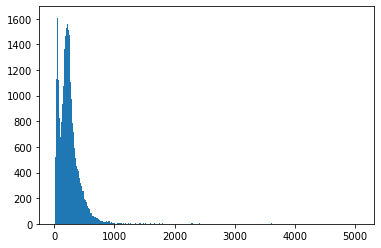

In [ ]:

plt.hist([len(x) for x in X], bins=500)
plt.show()

In [ ]:
print("max:"+str(max(len(x) for x in X)))
print("min:"+str(min(len(x) for x in X)))

#print(str(data.shape[0]))
print("Tổng phần tử:"+str(len(X)))
nos = np.array([len(x) for x in X])
len(nos[nos  < 700])


max:5066
min:7
Tổng phần tử:44267


43353

In [ ]:
#xác định kích cỡ tin: max_len_news
max_len_news = 700
#pad_sequences biến đổi các tin về kích cỡ max_len_news
  #nếu ít hơn max_len_news, số 0 được điền thêm vào
  #0 không được liên kết với bất kỳ từ nào, vì ánh xạ các từ bắt đầu từ 1
X = pad_sequences(X, maxlen=max_len_news)

### 

In [ ]:
#đưa phần nhúng từ vào

#tăng word_index thêm 1, như vậy word_index đầu tin(0) lưu giá trị "UNKNOWN" toàn số 0
vocab_size = len(tokenizer_lstm.word_index) + 1

def get_word_embedding(model, vocab):
    #size tập từ vựng +1 cho từ "UNKNOWN"
    vocab_size = len(vocab) + 1
    #word_embedding: matrix toàn số 0 có chiều[vocab_size, 100]
    #100 là kích cỡ matrix, phải cùng size matrix trong nhúng từ 
    word_embedding = np.zeros((vocab_size, 100))
    #mỗi hàng trong word_embedding là 1 từ(ánh xạ)
    for word, i in vocab.items():
        word_embedding[i] = model[word]
    return word_embedding

In [ ]:
embedding_vectors = get_word_embedding(cbow, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### Thiết lập mạng LSTM

In [ ]:
#set LSTM
def create_model(vocab_size, embedding_vectors, max_len_news):
  #tạo RNN trước. Sequential() gọi RNN trong thư viện tf. LSTM là 1 dạng của RNN.
  model = Sequential()

  #đưa embeddidng layer vào
  model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=max_len_news, trainable=False))
  #model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], trainable=False))

  #thêm LSTM 
  model.add(LSTM(units=128))

  #Dense: Layer này cũng như một layer neural network bình thường, với các tham số sau:
    #units : số chiều output, như số class sau khi train ( chó , mèo, lợn, gà)
    #activation : chọn activation đơn giản với sigmoid thì output có 1 class.
    #use_bias : có sử dụng bias hay không (True or False)
  model.add(Dense(1, activation='sigmoid'))
  #compile: Ở hàm này chúng ta sử dụng để training models như thuật toán train qua optimizer như Adam, SGD, RMSprop,..(tối ưu model)
  #adam là là một phương pháp giảm độ dốc ngẫu nhiên(stochastic gradient descent) dựa trên ước tính thích ứng của các khoảnh khắc bậc nhất và bậc hai.
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model

#del embedding_vectors

#vd tạo mạng neural https://viblo.asia/p/lam-quen-voi-keras-gGJ59mxJ5X2 
#adam: https://viblo.asia/p/thuat-toan-toi-uu-adam-aWj53k8Q56m 

In [ ]:
model = create_model(vocab_size, embedding_vectors, max_len_news)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 700, 100)          12223800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 12,341,177
Trainable params: 117,377
Non-trainable params: 12,223,800
_________________________________________________________________


## Huấn luyện và thử nhiệm


### Huấn luyện



*   Dữ liệu được chia thành tập train và test theo tỉ lệ 7:3.



In [ ]:
from sklearn.model_selection import KFold
#chia train&test
#mặc định 25% cho test, ngược lại cấu hình test_size: test_size=0.4 ->40% cho test hoặc test_size=4 ->4 phần từ trong test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
print(str(len(X_train)) +" " + str(len(X_test)))


30986 13281


In [ ]:
#https://keras.rstudio.com/reference/fit.html
#https://www.phamduytung.com/blog/2018-10-02-understanding-epoch-batchsize-iterations/

model_verS = create_model(vocab_size, embedding_vectors, max_len_news)

#Khi dữ liệu quá lớn(triệu), data dùng để huấn luyện khi được đưa vào chia làm các batch(batch_size), đơn vị nhỏ hơn là epochs. 
#batch_size: Mặc định = 32
#epochs: Ở đây chỉ hiện thị final epoch. Mỗi epochs thực hiện trên 32 mẫu nhỏ: 628*32 = train, phần còn lại là val. train + val = X_train
#verbose: dạng hiển thị kết quả train(3 dạng)
#validation_split=0.3: tác dụng như k-fold, giữ 30% trong tập train làm kiểm thử, kí hiệu là val(validation)

model_verS.fit(X_train, Y_train, validation_split=0.3, epochs= 10)

Epoch 1/10
678/678 [==============================] - 460s 675ms/step - loss: 0.1415 - acc: 0.9503 - val_loss: 0.1123 - val_acc: 0.9636
Epoch 2/10
678/678 [==============================] - 457s 674ms/step - loss: 0.0944 - acc: 0.9649 - val_loss: 0.0662 - val_acc: 0.9776
Epoch 3/10
678/678 [==============================] - 455s 671ms/step - loss: 0.0525 - acc: 0.9827 - val_loss: 0.0412 - val_acc: 0.9862
Epoch 4/10
678/678 [==============================] - 457s 674ms/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0298 - val_acc: 0.9903
Epoch 5/10
678/678 [==============================] - 458s 675ms/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0278 - val_acc: 0.9906
Epoch 6/10
678/678 [==============================] - 459s 677ms/step - loss: 0.0137 - acc: 0.9957 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 7/10
678/678 [==============================] - 457s 674ms/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0249 - val_acc: 0.9924
Epoch 8/10
678/678 [============================

### Thử nghiệm


*   Điểm đánh giá phân loại tin: > 0.5 là tin thật, ngược lại là giả.


In [ ]:
Y_pred = (model_verS.predict(X_test) > 0.5).astype("int")
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6829
           1       0.99      0.99      0.99      6452

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



accuracy score: 99.43%
f1_score: 99.41%
recall score: 99.38%
precision score: 99.44%


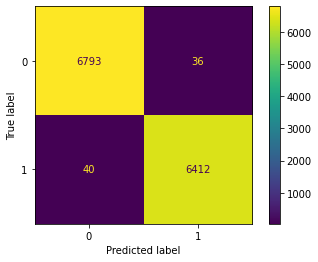

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

print("accuracy score: {}%".format(round(accuracy_score(Y_test, Y_pred)*100,2)))
print("f1_score: {}%".format(round(f1_score(Y_test, Y_pred)*100,2)))
print("recall score: {}%".format(round(recall_score(Y_test, Y_pred)*100,2)))
print("precision score: {}%".format(round(precision_score(Y_test, Y_pred)*100,2)))
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

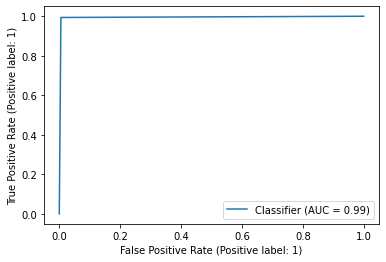

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Y_pred)
plt.show()